In [1]:
import dataset

trainingDB = dataset.TrainingsetDB()
testDB = dataset.TestsetDB()

In [16]:
face = trainingDB.getFace(1)

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

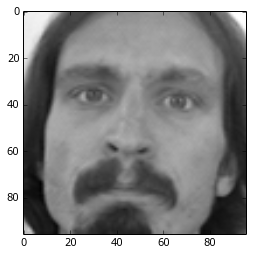

In [17]:
plt.imshow(face.image, cmap = 'gray')

In [5]:
featureImage = face.getFeatureImage(dataset.RIGHT_EYE_CENTER, (30, 10))

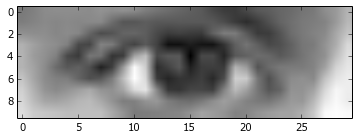

In [6]:
plt.imshow(featureImage, cmap = 'gray')

<function __main__.<lambda>>

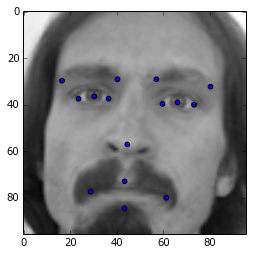

In [7]:
import matplotlib.patches as patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

def showFace(face):
    fig,ax = plt.subplots()
    for key, value in face.features.iteritems():
        ax.add_patch(patches.Circle(value,1))
    ax.imshow(face.image, cmap = 'gray')

showTrainingFace = lambda faceId : showFace(trainingDB.getFace(faceId))
interact(showTrainingFace, faceId=widgets.IntSlider(min=1,max=trainingDB.rows(),step=1,value=0))

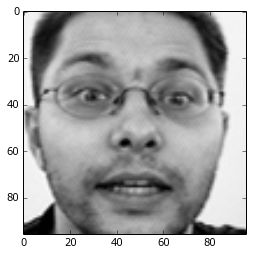

In [8]:
showFace(testDB.getFace(1))

In [9]:
import pandas as pd
means = pd.read_csv('means.csv', index_col='name')

In [10]:
for face in testDB.getFaces():
    for key,value in dataset.featuresNames.iteritems():
        position = (means['position'][value + '_x'], means['position'][value + '_y'])
        face.setFeaturePosition(key, position)

In [11]:
testDB.write()

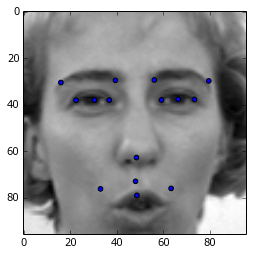

In [12]:
showTestFace = lambda faceId : showFace(testDB.getFace(faceId))
interact(showTestFace, faceId=widgets.IntSlider(min=1,max=testDB.rows(),step=1,value=0))

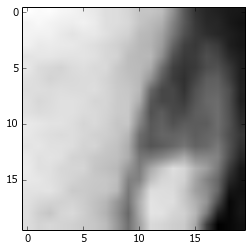

In [22]:
plt.imshow(db.randomSubImage(1, (20, 20), dataset.allFeatures), cmap = 'gray')